In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import meshio

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('data/z_map_SCHZ.csv', index_col=0)
df = pd.concat([df, pd.read_csv('data/z_map_CONTROL.csv', index_col=0)], axis=0, sort=False)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V36026,V36027,V36028,V36029,V36030,V36031,V36032,V36033,V36034,V36035
sub-50004,-0.249680,0.248854,-0.029865,0.227222,0.217076,-0.021050,0.233288,-0.053434,0.099724,0.046579,...,0.203346,0.203346,0.203346,0.203346,0.203346,0.203346,0.203346,0.203346,0.203346,0.203346
sub-50005,-0.005795,0.325971,-0.100571,0.032710,0.004507,0.568912,0.134992,0.317285,0.212446,0.125694,...,0.051282,0.051282,0.051282,0.051282,0.051282,0.051282,0.051282,0.051282,0.051282,0.051282
sub-50006,-0.179114,0.390125,-0.146700,-0.176906,-0.004321,0.239694,0.002101,0.282537,0.097241,0.289284,...,0.040987,0.040987,0.040987,0.040987,0.040987,0.040987,0.040987,0.040987,0.040987,0.040987
sub-50007,0.003536,0.106008,-0.029503,0.124985,0.030513,0.046936,0.086793,0.020311,-0.041692,0.010124,...,-0.035041,-0.035041,-0.035041,-0.035041,-0.035041,-0.035041,-0.035041,-0.035041,-0.035041,-0.035041
sub-50008,0.197315,0.081902,-0.257717,0.053458,0.023555,0.071280,0.028053,-0.014057,0.115780,0.119316,...,-0.111873,-0.111873,-0.111873,-0.111873,-0.111873,-0.111873,-0.111873,-0.111873,-0.111873,-0.111873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-11131,-0.065412,0.009015,-0.061899,0.036816,-0.083671,0.309071,0.012496,-0.070891,0.122383,0.249626,...,0.017023,0.017023,0.017023,0.017023,0.017023,0.017023,0.017023,0.017023,0.017023,0.017023
sub-11142,0.063746,0.071464,-0.085038,-0.387997,0.213941,0.065337,0.050615,0.080682,-0.156452,0.361497,...,-0.166155,-0.166155,-0.166155,-0.166155,-0.166155,-0.166155,-0.166155,-0.166155,-0.166155,-0.166155
sub-11143,-0.104203,0.079859,0.079420,0.091621,0.261508,0.048700,0.090219,-0.001317,-0.015689,0.048528,...,0.126055,0.126055,0.126055,0.126055,0.126055,0.126055,0.126055,0.126055,0.126055,0.126055
sub-11149,-0.002479,-0.067172,-0.040642,-0.067536,0.025194,-0.004014,0.084706,-0.049375,0.121490,0.219506,...,-0.057018,-0.057018,-0.057018,-0.057018,-0.057018,-0.057018,-0.057018,-0.057018,-0.057018,-0.057018


In [4]:
n_comp = 5

In [5]:
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
pca = PCA(n_components=n_comp).fit(std_df)
pca_df = pd.DataFrame(pca.transform(std_df), index=df.index)
pca_df

,0,1,2,3,4
sub-50004,14.847638,-51.382988,9.680166,-17.553175,41.308105
sub-50005,157.598001,-62.604711,-64.339478,8.286480,38.770772
sub-50006,137.801008,-48.687173,6.623032,-30.419766,36.973869
sub-50007,-39.436767,4.945089,6.524615,7.749048,-7.774046
sub-50008,-24.913032,-5.871399,27.026933,-3.452354,6.052504
...,...,...,...,...,...
sub-11131,2.149559,13.468475,-3.173913,-14.212095,-1.911946
sub-11142,41.855738,64.131722,7.009236,7.311552,-20.790656
sub-11143,-66.320092,-16.168011,7.478380,0.731232,-3.511657
sub-11149,-30.783909,5.174554,3.271883,3.985570,-13.211369


Text(0.5, 0, 'Number of Principal Components')

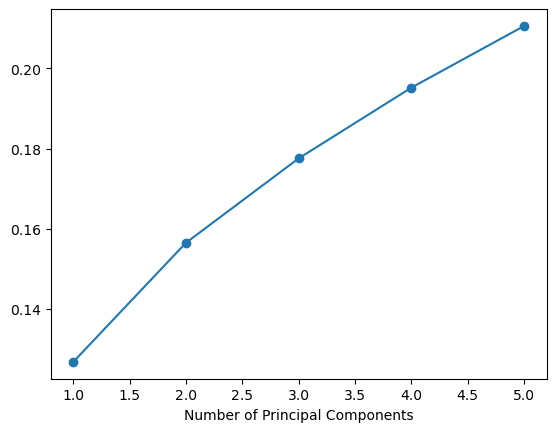

In [6]:
evr = pca.explained_variance_ratio_
cum_evr = np.cumsum(evr)
plt.plot(range(1, len(evr) + 1), cum_evr, marker='o')
# plt.hlines(y=0.8, color='r', linestyle='--', xmin=1, xmax=len(evr))
plt.xlabel('Number of Principal Components')

In [7]:
pcs = pd.DataFrame(
    pca.components_,
    index=[f"PC{i+1}" for i in range(pca.n_components_)],
    columns=df.columns
)
pcs

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V36026,V36027,V36028,V36029,V36030,V36031,V36032,V36033,V36034,V36035
PC1,-0.000754,0.007435,0.000431,-0.000362,0.000002,0.004965,0.004863,0.003896,0.005719,0.003301,...,-0.000306,-0.000306,-0.000306,-0.000306,-0.000306,-0.000306,-0.000306,-0.000306,-0.000306,-0.000306
PC2,0.001266,0.001076,-0.001820,-0.002846,-0.000146,-0.003060,0.001239,0.002813,-0.000513,0.004463,...,0.003360,0.003360,0.003360,0.003360,0.003360,0.003360,0.003360,0.003360,0.003360,0.003360
PC3,0.008172,-0.001619,0.001641,0.002684,0.004014,-0.003208,0.006586,0.001116,-0.000802,0.002253,...,-0.002869,-0.002869,-0.002869,-0.002869,-0.002869,-0.002869,-0.002869,-0.002869,-0.002869,-0.002869
PC4,0.004562,-0.000654,0.008256,0.002176,0.001676,-0.007499,0.004129,0.005111,0.000235,0.006542,...,0.003645,0.003645,0.003645,0.003645,0.003645,0.003645,0.003645,0.003645,0.003645,0.003645
PC5,0.007385,0.002445,0.004758,0.004430,0.004416,-0.005472,-0.000036,0.012999,-0.000255,0.000480,...,0.021165,0.021165,0.021165,0.021165,0.021165,0.021165,0.021165,0.021165,0.021165,0.021165


In [8]:
sil_scores = []
best_k = 0
best_sil = -1
best_model = None
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, n_init=10, init="k-means++", random_state=42)
    kmeans.fit(pca_df)
    labels = kmeans.labels_
    sil = silhouette_score(pca_df, labels)
    sil_scores.append(sil)
    if sil > best_sil:
        best_sil = sil
        best_k = k
        best_model = kmeans

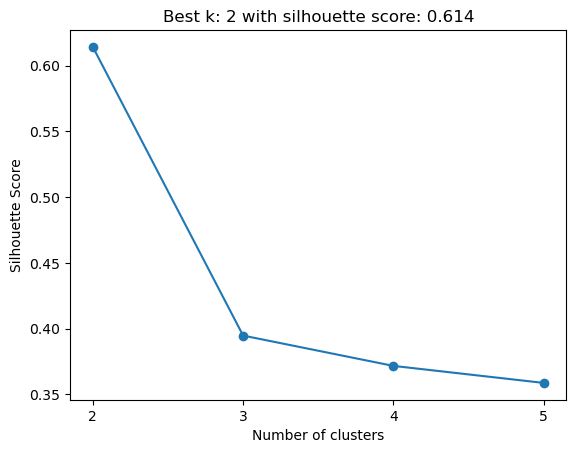

In [9]:
plt.plot([2, 3, 4, 5], sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks([2, 3, 4, 5])
plt.title(f'Best k: {best_k} with silhouette score: {best_sil:.3f}')
plt.show()

In [10]:
centers = pd.DataFrame(
    best_model.cluster_centers_,
    columns=pca_df.columns
)
centers

,0,1,2,3,4
0,-14.880168,2.707045,1.881782,-0.941001,-0.198058
1,156.737771,-28.514210,-19.821439,9.911879,2.086207


In [11]:
best_model.labels_

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [16]:
count_labels = pd.Series(best_model.labels_).value_counts().sort_index()
count_labels

0    158
1     15
Name: count, dtype: int64

In [21]:
# index of the 1 labels
idx_1 = np.where(best_model.labels_ == 1)[0]
idx_1

array([  1,   2,   8,  16,  22,  33,  39,  42,  48,  49,  52,  55,  68,
       129, 141])

In [18]:
# retrieve row indices of the original dataframe of group 1
group_1_indices = df.index[best_model.labels_ == 1].tolist()
group_1_indices

['sub-50005',
 'sub-50006',
 'sub-50015',
 'sub-50029',
 'sub-50043',
 'sub-50058',
 'sub-50067',
 'sub-50075',
 'sub-50085',
 'sub-10159',
 'sub-10193',
 'sub-10225',
 'sub-10316',
 'sub-10882',
 'sub-10977']

In [12]:
# compute the real centers according to the labels usign the entries from the dtaset directly
real_centers = []
for i in range(best_k):
    real_centers.append(df.iloc[best_model.labels_ == i].mean(axis=0).values)
real_centers = pd.DataFrame(real_centers, columns=df.columns)
real_centers

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V36026,V36027,V36028,V36029,V36030,V36031,V36032,V36033,V36034,V36035
0,0.002909,0.073389,-0.042552,-0.003914,0.032352,0.098374,0.064478,0.034938,0.063541,0.112567,...,0.040901,0.040901,0.040901,0.040901,0.040901,0.040901,0.040901,0.040901,0.040901,0.040901
1,-0.065398,0.196700,-0.037568,-0.014825,-0.017242,0.175740,0.138145,0.151409,0.204800,0.142973,...,0.039183,0.039183,0.039183,0.039183,0.039183,0.039183,0.039183,0.039183,0.039183,0.039183


In [14]:
nodes = pd.read_csv("./data/mesh/points.csv", header=0, index_col=0).values
elem = pd.read_csv("./data/mesh/elements.csv", header=0, index_col=0)
elem_values = elem.values - 1
cells = [("tetra", elem_values)]

point_data = {}

point_data["centroid_mv_1"] = real_centers.iloc[0].values
point_data["centroid_mv_2"] = real_centers.iloc[1].values

mesh = meshio.Mesh(points=nodes, cells=cells, point_data=point_data)
mesh.write(os.path.join("application_mv.vtu"))